   # RATINGS PREDICTION
 
### Problem Statement
We have a client who has a website where people write different reviews for technical products. 
Now they are adding a new feature to their website i.e. The reviewer will have to add stars(rating) 
as well with the review. The rating is out 5 stars and it only has 5 options available 1 star, 2 stars, 
3 stars, 4 stars, 5 stars. Now they want to predict ratings for the reviews which were written in the 
past and they don’t have a rating. So, we have to build an application which can predict the rating 
by seeing the review.


   ## Data Collection Phase 

You have to scrape at least 20000 rows of data. You can scrape more data as well, it’s up to you. 
more the data better the model
In this section you need to scrape the reviews of different laptops, Phones, Headphones, smart 
watches, Professional Cameras, Printers, Monitors, Home theater, Router from different ecommerce websites.
Basically, we need these columns:-

1) reviews of the product.

2) rating of the product.

You can fetch other data as well, if you think data can be useful or can help in the project. It 
completely depends on your imagination or assumption.

   #### Hint:

• Try to fetch data from different websites. If data is from different websites, it will help our 
model to remove the effect of over fitting.
• Try to fetch an equal number of reviews for each rating, for example if you are fetching
10000 reviews then all ratings 1,2,3,4,5 should be 2000. It will balance our data set.
• Convert all the ratings to their round number, as there are only 5 options for rating i.e., 
1,2,3,4,5. If a rating is 4.5 convert it 5.

   ## Model Building Phase
   
After collecting the data, you need to build a machine learning model. Before model building do 
all data preprocessing steps involving NLP. Try different models with different hyper parameters 
and select the best model.
Follow the complete life cycle of data science. Include all the steps like1. Data Cleaning
2. Exploratory Data Analysis
3. Data Preprocessing
4. Model Building
5. Model Evaluation
6. Selecting the best mode

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("RatingsandReviews.csv")
df1 = pd.read_csv("Amazon_Ratings.csv")

In [3]:
data = pd.concat([df,df1],axis = 0, ignore_index=True)
data

,Unnamed: 0,Review,Ratings,Unnamed: 0.1
0,0,1. Material Quality - Not Bad... 2. Sound Qual...,5,NaN
1,1,Writing this review after using more than 15 d...,5,NaN
2,2,One of the best Bluetooth Boat. 1- Battery Bac...,5,NaN
3,3,Nice product and fast delivery . I am happy ni...,5,NaN
4,4,Delivered in 20 February.. today is 28 Februar...,4,NaN
...,...,...,...,...
152228,83804,Only one problem,4,83804.0
152229,83805,Vfm. Range of Archer c6 or A6 without mu-mimo,4,83805.0
152230,83806,USB port is not supported for printer,4,83806.0
152231,83807,A best buy for that price range,4,83807.0


In [4]:
data.tail(20)

,Unnamed: 0,Review,Ratings,Unnamed: 0.1
152213,83787,Working Good,4,83787.0
152214,83788,Good product,4,83788.0
152215,83789,Not faced a single issue. It's been 8 months,4,83789.0
152216,83790,Good product,4,83790.0
152217,83791,Cool router with Mu-Mimo technology,4,83791.0
152218,83792,Featured router,4,83792.0
152219,83793,Elegant and capable,4,83793.0
152220,83794,"Good purchase, Every device connected is getti...",4,83794.0
152221,83795,Worth price,4,83795.0
152222,83796,Good but not better. Bit expensive for the pri...,4,83796.0


In [5]:
data = data.drop(columns = ["Unnamed: 0","Unnamed: 0.1"])
data

,Review,Ratings
0,1. Material Quality - Not Bad... 2. Sound Qual...,5
1,Writing this review after using more than 15 d...,5
2,One of the best Bluetooth Boat. 1- Battery Bac...,5
3,Nice product and fast delivery . I am happy ni...,5
4,Delivered in 20 February.. today is 28 Februar...,4
...,...,...
152228,Only one problem,4
152229,Vfm. Range of Archer c6 or A6 without mu-mimo,4
152230,USB port is not supported for printer,4
152231,A best buy for that price range,4


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152233 entries, 0 to 152232
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   Review   152233 non-null  object
 1   Ratings  152233 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 2.3+ MB


In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Ratings,152233.0,3.71252,1.460668,1.0,3.0,4.0,5.0,5.0


In [8]:
data.isnull().sum()

Review     0
Ratings    0
dtype: int64

In [9]:
data.isnull().sum().sum()

0

In [10]:
data["Ratings"].value_counts()

5    67110
4    31746
1    22199
3    18079
2    13099
Name: Ratings, dtype: int64

In [11]:
data["Review"].value_counts()

Good                                                                                   5277
Nice                                                                                   2468
Good product                                                                           2128
Nice product                                                                           1492
Super                                                                                   938
                                                                                       ... 
It has screen bleed issue                                                                 1
good quality and cheaply                                                                  1
Pictures quality so good                                                                  1
Remote not working properly, kindly inspect properly before packing                       1
Sound is good and bass is very nice it is easy to use.good product.u can go for 

In [12]:
def plot_labels(data, title=None):
    ds_labels = data["Ratings"].value_counts(normalize=True)
    ds_labels.sort_index(inplace=True)
    plt.figure(figsize=(4,3))
    ax = ds_labels.plot(kind="bar")
    ax.set_xlabel("Stars")
    ax.set_ylabel("Ratio")
    if title is not None:
        plt.savefig(title + ".eps")
    plt.show()

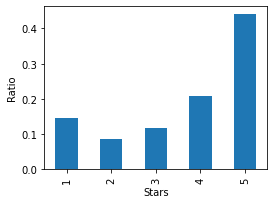

In [13]:
plot_labels(data, "stars")

I can observe that the dataset is imbalanced.

In [14]:
from nltk.stem import WordNetLemmatizer
import nltk
from nltk.corpus import  stopwords
import string
nltk.download("stopwords")
nltk.download("wordnet")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\asus\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\asus\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

#### Data Pre-Processing

In [15]:
data['length']= data.Review.str.len()
data.head(20)

,Review,Ratings,length
0,1. Material Quality - Not Bad... 2. Sound Qual...,5,268
1,Writing this review after using more than 15 d...,5,292
2,One of the best Bluetooth Boat. 1- Battery Bac...,5,142
3,Nice product and fast delivery . I am happy ni...,5,68
4,Delivered in 20 February.. today is 28 Februar...,4,500
5,This product is acctullly best. best coloty an...,4,237
6,"Great product., battery backup up to 14 days u...",5,108
7,Battery backup is best and full charge very qu...,5,125
8,Just got my hands on this product. Let me be h...,4,500
9,"I got this product on 5th oct 2021 , today is ...",4,499


Here, I created another column length based on the length of reviews.

In [16]:
# convert to lower case
data['Review']= data['Review'].str.lower()

# replace email address
data['Review']= data['Review'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$', 'emailaddr')

# replace web address
data['Review']= data['Review'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$','webaddress')

# replace money symbols
data['Review']=data['Review'].str.replace(r'£|\$', 'moneysymb')

# replace 10 digit phone numbers with 'phonenumber'
data['Review']=data['Review'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$','phonenumbr')

# replace normal numbers with 'numbr'
data['Review']= data['Review'].str.replace(r'\d+(\.\d+)?','numbr')

#handling all the punctuation in the comment's
data['Review'] = data['Review'].apply(lambda x: ' '.join(
    term for term in x.split() if term not in string.punctuation))

#Giving the stopwords and a few extra words along with the pre-defined stopwords
stop_words = set(stopwords.words('english') + ['u', 'ü', 'ur', '4', '2', 'im', 'dont', 'doin', 'ure'])
data['Review'] = data['Review'].apply(lambda x: ' '.join(
    term for term in x.split() if term not in stop_words))

# Used the Lemmatizer in the column, "Comment_text"
lem=WordNetLemmatizer()
data['Review'] = data['Review'].apply(lambda x: ' '.join(
 lem.lemmatize(t) for t in x.split()))

In [17]:
def remove_emoji(string):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

In [18]:
data["Review"]=data["Review"].apply(remove_emoji)

In [19]:
data['clean_length'] = data.Review.str.len()
data

,Review,Ratings,length,clean_length
0,numbr. material quality bad... numbr. sound qu...,5,268,245
1,writing review using numbr days. numbrf pro+ s...,5,292,199
2,one best bluetooth boat. numbr- battery backup...,5,142,147
3,nice product fast delivery happy nice job flip...,5,68,57
4,delivered numbr february.. today numbr februar...,4,500,411
...,...,...,...,...
152228,one problem,4,16,11
152229,vfm. range archer cnumbr anumbr without mu-mimo,4,45,47
152230,usb port supported printer,4,37,26
152231,best buy price range,4,31,20


In [20]:
# Total length removal
print ('Origian Length', data.length.sum())
print ('Clean Length', data.clean_length.sum())

Origian Length 6723823
Clean Length 5118499


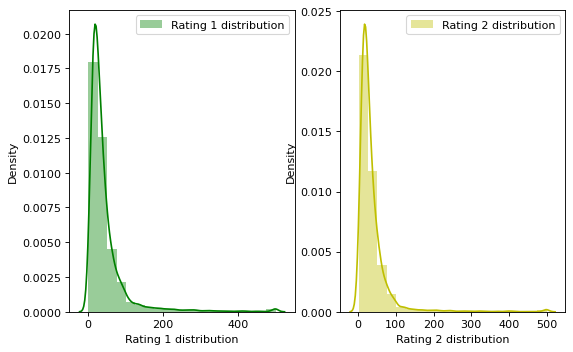

In [21]:
#message distribution before cleaning

f,ax = plt.subplots(1,2,figsize=(8,5),dpi=80)

sns.distplot(data[data['Ratings']==1]['length'],bins=20,ax=ax[0],label='Rating 1 distribution',color='g')
ax[0].set_xlabel('Rating 1 distribution')
ax[0].legend()

sns.distplot(data[data['Ratings']==2]['length'],bins=20,ax=ax[1],label='Rating 2 distribution',color='y')
ax[1].set_xlabel('Rating 2 distribution')
ax[1].legend()

plt.show()

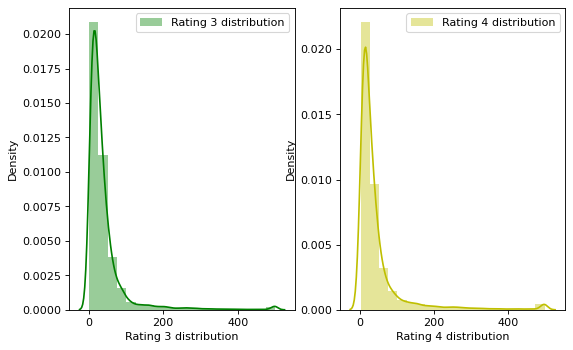

In [22]:
f,ax = plt.subplots(1,2,figsize=(8,5),dpi=80)

sns.distplot(data[data['Ratings']==3]['length'],bins=20,ax=ax[0],label='Rating 3 distribution',color='g')
ax[0].set_xlabel('Rating 3 distribution')
ax[0].legend()

sns.distplot(data[data['Ratings']==4]['length'],bins=20,ax=ax[1],label='Rating 4 distribution',color='y')
ax[1].set_xlabel('Rating 4 distribution')
ax[1].legend()

plt.show()

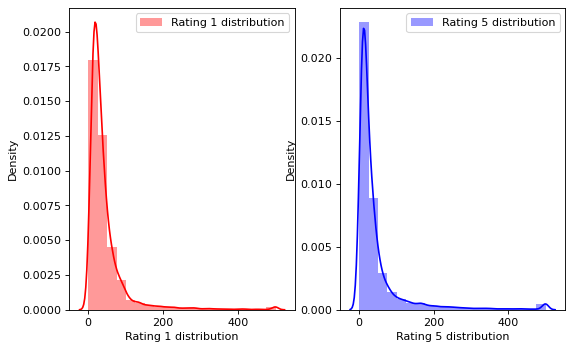

In [23]:
f,ax = plt.subplots(1,2,figsize=(8,5),dpi=80)

sns.distplot(data[data['Ratings']==1]['length'],bins=20,ax=ax[0],label='Rating 1 distribution',color='r')
ax[0].set_xlabel('Rating 1 distribution')
ax[0].legend()

sns.distplot(data[data['Ratings']==5]['length'],bins=20,ax=ax[1],label='Rating 5 distribution',color='b')
ax[1].set_xlabel('Rating 5 distribution')
ax[1].legend()

plt.show()

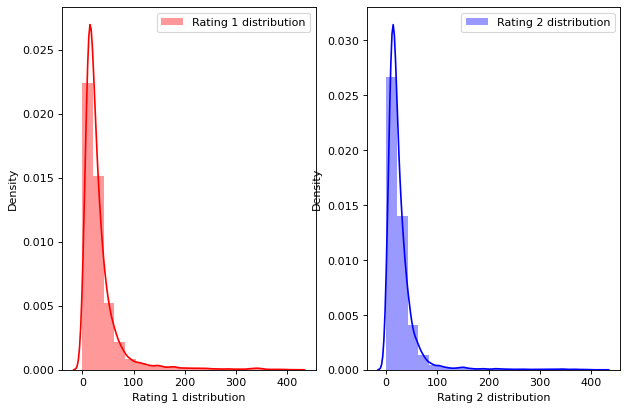

In [24]:
#message distribution after cleaning

f,ax = plt.subplots(1,2,figsize=(9,6),dpi=80)

sns.distplot(data[data['Ratings']==1]['clean_length'],bins=20,ax=ax[0],label='Rating 1 distribution',color='r')
ax[0].set_xlabel('Rating 1 distribution')
ax[0].legend()

sns.distplot(data[data['Ratings']==2]['clean_length'],bins=20,ax=ax[1],label='Rating 2 distribution',color='b')
ax[1].set_xlabel('Rating 2 distribution')
ax[1].legend()

plt.show()

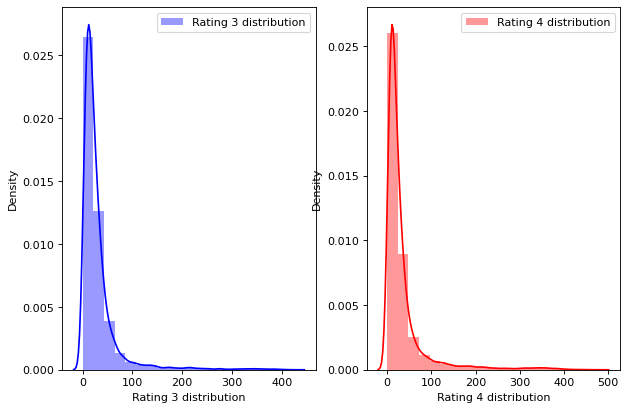

In [25]:
f,ax = plt.subplots(1,2,figsize=(9,6),dpi=80)

sns.distplot(data[data['Ratings']==3]['clean_length'],bins=20,ax=ax[0],label='Rating 3 distribution',color='b')
ax[0].set_xlabel('Rating 3 distribution')
ax[0].legend()

sns.distplot(data[data['Ratings']==4]['clean_length'],bins=20,ax=ax[1],label='Rating 4 distribution',color='r')
ax[1].set_xlabel('Rating 4 distribution')
ax[1].legend()

plt.show()

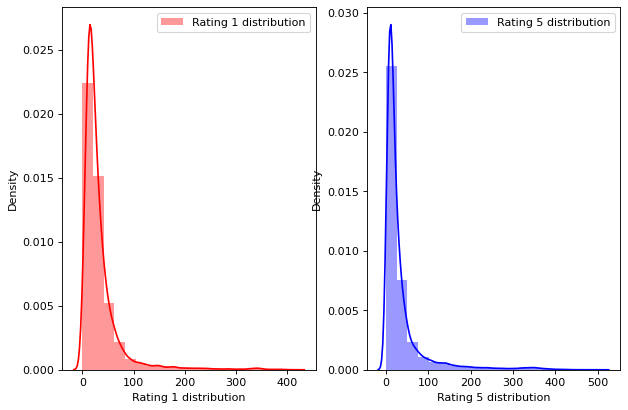

In [26]:
f,ax = plt.subplots(1,2,figsize=(9,6),dpi=80)

sns.distplot(data[data['Ratings']==1]['clean_length'],bins=20,ax=ax[0],label='Rating 1 distribution',color='r')
ax[0].set_xlabel('Rating 1 distribution')
ax[0].legend()

sns.distplot(data[data['Ratings']==5]['clean_length'],bins=20,ax=ax[1],label='Rating 5 distribution',color='b')
ax[1].set_xlabel('Rating 5 distribution')
ax[1].legend()

plt.show()

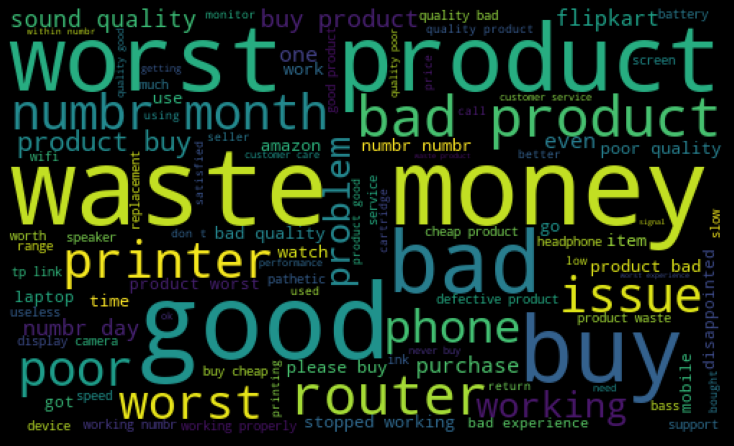

In [27]:
from wordcloud import WordCloud
ratings1 = data['Review'][data['Ratings']==1]
spam_cloud = WordCloud(width=500,height=300,background_color='black',max_words=100).generate(' '.join(ratings1))
plt.figure(figsize=(10,8),facecolor='k')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

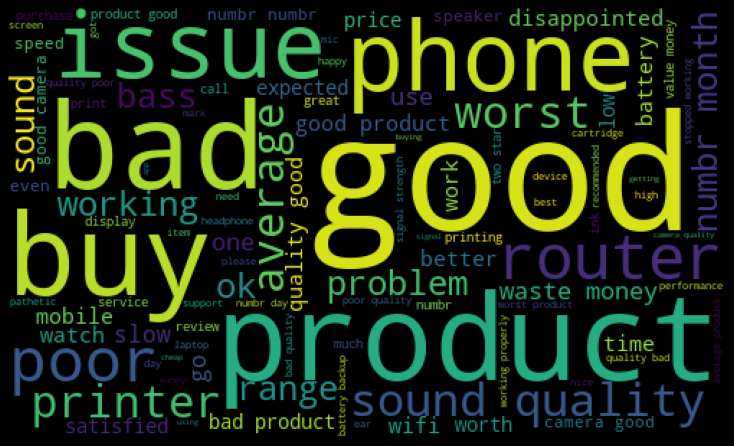

In [28]:
ratings2 = data['Review'][data['Ratings']==2]
spam_cloud = WordCloud(width=500,height=300,background_color='black',max_words=100).generate(' '.join(ratings2))
plt.figure(figsize=(10,8),facecolor='k')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

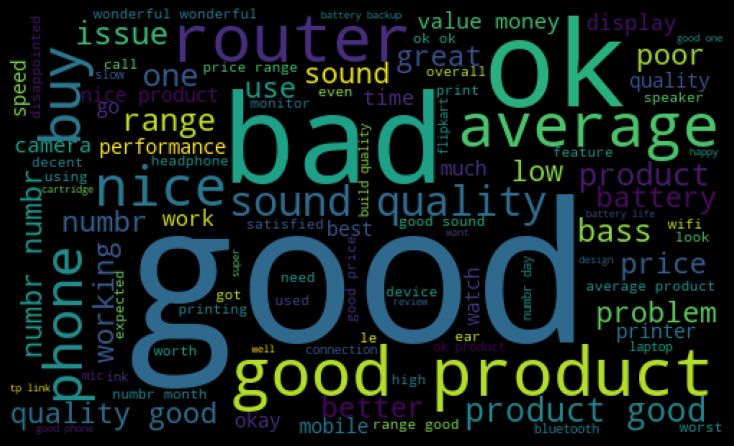

In [29]:
ratings3 = data['Review'][data['Ratings']==3]
spam_cloud = WordCloud(width=500,height=300,background_color='black',max_words=100).generate(' '.join(ratings3))
plt.figure(figsize=(10,8),facecolor='k')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

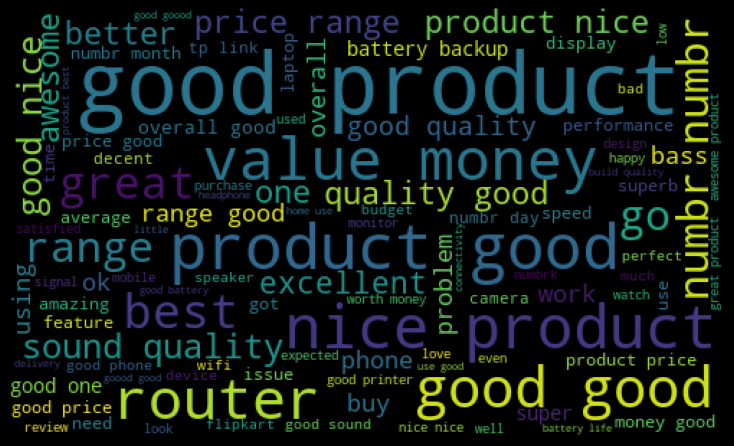

In [30]:
ratings4 = data['Review'][data['Ratings']==4]
spam_cloud = WordCloud(width=500,height=300,background_color='black',max_words=100).generate(' '.join(ratings4))
plt.figure(figsize=(10,8),facecolor='k')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

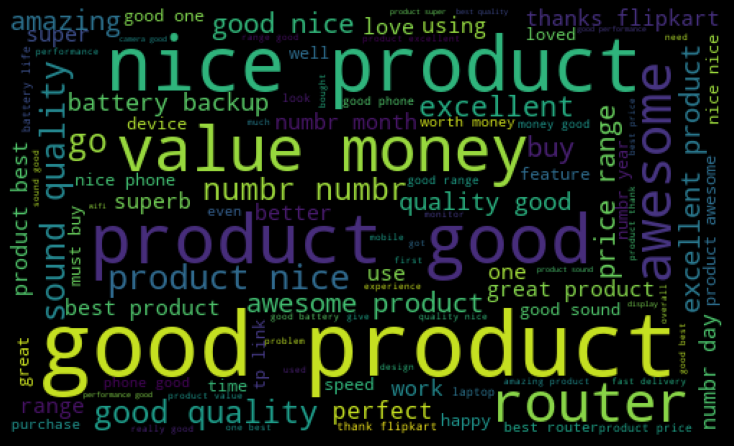

In [31]:
ratings5 = data['Review'][data['Ratings']==5]
spam_cloud = WordCloud(width=500,height=300,background_color='black',max_words=100).generate(' '.join(ratings5))
plt.figure(figsize=(10,8),facecolor='k')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer

tf_vec=TfidfVectorizer()
feature1=tf_vec.fit_transform(data['Review'])

In [33]:
x = feature1

In [34]:
y = data['Ratings']

In [35]:
#splitting the data into training and testing data

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=9)

In [36]:
from collections import Counter
print("The number of classes before fit{}".format(Counter(y_train)))

The number of classes before fitCounter({5: 53712, 4: 25321, 1: 17764, 3: 14474, 2: 10515})


In [37]:
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE

# transforming the dataset
os=SMOTE(sampling_strategy = {1: 67110, 2: 67110, 3: 67110, 4: 67110, 5: 67110})
x_train_ns,y_train_ns=os.fit_resample(x_train,y_train)

print("The number of classes before fit{}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_ns)))

The number of classes before fitCounter({5: 53712, 4: 25321, 1: 17764, 3: 14474, 2: 10515})
The number of classes after fit Counter({5: 67110, 4: 67110, 1: 67110, 2: 67110, 3: 67110})


In [38]:
#Importing all the model library

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB

#Importing Boosting models
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier

#Importing error metrics
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_curve,auc
from sklearn.model_selection import GridSearchCV,cross_val_score

In [39]:
DT=DecisionTreeClassifier(random_state=6)
RF=RandomForestClassifier()
ADA=AdaBoostClassifier()
MNB=MultinomialNB()

In [40]:
models= []
models.append(('DecisionTreeClassifier', DT))
models.append(('RandomForestClassifier', RF))
models.append(('AdaBoostClassifier', ADA))
models.append(('MultinomialNB', MNB))

****************************************** DecisionTreeClassifier ********************************************************


DecisionTreeClassifier(random_state=6)


Accuracy_score =  0.5865602522416001


Cross_Val_Score =  0.5383918001458714


classification_report
               precision    recall  f1-score   support

           1       0.65      0.68      0.67      4435
           2       0.43      0.44      0.43      2584
           3       0.44      0.44      0.44      3605
           4       0.43      0.51      0.47      6425
           5       0.74      0.66      0.70     13398

    accuracy                           0.59     30447
   macro avg       0.54      0.55      0.54     30447
weighted avg       0.60      0.59      0.59     30447



[[3025  506  400  247  257]
 [ 610 1130  395  223  226]
 [ 430  387 1594  674  520]
 [ 235  251  611 3295 2033]
 [ 319  347  645 3272 8815]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)



****************************************** RandomFor

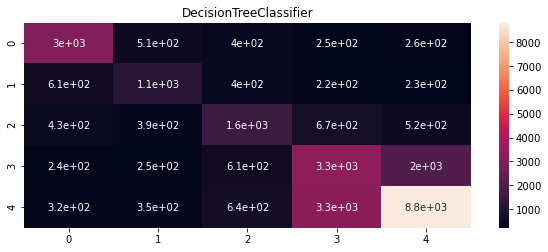

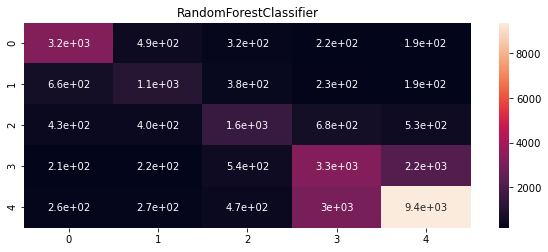

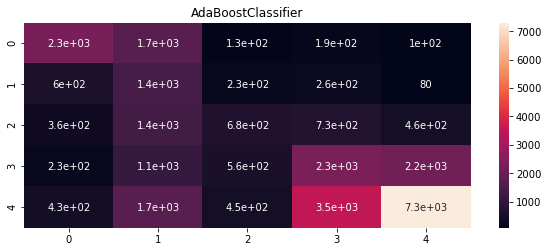

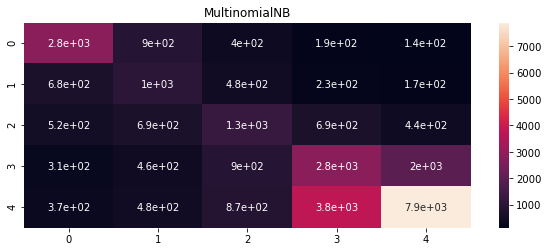

In [41]:
Model= []
score= []
cvs=[]
for name,model in models:
    print('******************************************',name,'********************************************************')
    print('\n')
    Model.append(name)
    model.fit(x_train_ns,y_train_ns)
    print(model)
    pre=model.predict(x_test)
    print('\n')
    AS=accuracy_score(y_test,pre)
    print('Accuracy_score = ',AS)
    score.append(AS*100)
    print('\n')
    sc= cross_val_score(model, x, y, cv=10, scoring='accuracy').mean()
    print('Cross_Val_Score = ',sc)
    cvs.append(sc*100)
    print('\n')
    print('classification_report\n',classification_report(y_test,pre))
    print('\n')
    cm=confusion_matrix(y_test,pre)
    print(cm)
    print('\n')
    plt.figure(figsize=(10,40))
    plt.subplot(911)
    plt.title(name)
    print(sns.heatmap(cm,annot=True))
    print('\n\n')

In [42]:
result = pd.DataFrame({'Model': Model, 'Accuracy_score': score,'Cross_val_score': cvs})
result

,Model,Accuracy_score,Cross_val_score
0,DecisionTreeClassifier,58.656025,53.839180
1,RandomForestClassifier,60.889414,56.555425
2,AdaBoostClassifier,46.030808,51.841560
3,MultinomialNB,51.883601,52.235037


##### Using gridsearch cv to find the best parameters in random forest

In [43]:
from sklearn.model_selection import GridSearchCV

parameters={'max_depth': [80, 90], 'min_samples_leaf': [3, 4], 'min_samples_split': [8, 10, 12], 'n_estimators': [100, 200]}
rfc=RandomForestClassifier()

clf=GridSearchCV(rfc,parameters,cv=5,n_jobs=-1)
clf.fit(x_train_ns,y_train_ns)
print(clf.best_params_)

{'max_depth': 90, 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 200}


In [44]:
#RandomForesetClassifier with best parameters

rfc=RandomForestClassifier(max_depth=90, min_samples_leaf=3, min_samples_split=8, n_estimators=200)
rfc.fit(x_train_ns,y_train_ns)
rfc.score(x_train_ns,y_train_ns)
predrfc=rfc.predict(x_test)
print(accuracy_score(y_test,predrfc))
print(confusion_matrix(y_test,predrfc))
print(classification_report(y_test,predrfc))

0.535389365126285
[[2881 1075  171  180  128]
 [ 713 1240  271  241  119]
 [ 461  928 1014  752  450]
 [ 272  707  502 2749 2195]
 [ 346 1061  336 3238 8417]]
              precision    recall  f1-score   support

           1       0.62      0.65      0.63      4435
           2       0.25      0.48      0.33      2584
           3       0.44      0.28      0.34      3605
           4       0.38      0.43      0.40      6425
           5       0.74      0.63      0.68     13398

    accuracy                           0.54     30447
   macro avg       0.49      0.49      0.48     30447
weighted avg       0.57      0.54      0.55     30447



In [47]:
result = pd.DataFrame({'Model': Model, 'Accuracy_score': score,'Cross_val_score': cvs})
result

,Model,Accuracy_score,Cross_val_score
0,DecisionTreeClassifier,58.656025,53.839180
1,RandomForestClassifier,60.889414,56.555425
2,AdaBoostClassifier,46.030808,51.841560
3,MultinomialNB,51.883601,52.235037


##### Random forest classifier is giving us best results so we save it as our final model.

In [54]:
#saving our model

import joblib
joblib.dump(RF,'Ratings_predict.pkl')

['Ratings_predict.pkl']

In [55]:
model=joblib.load('Ratings_predict.pkl')

In [56]:
#Testing our model

import sys
nums= model.predict(x_test)
np.set_printoptions(threshold=sys.maxsize)
print(nums)

[1 5 4 5 1 5 4 4 3 4 4 1 5 5 3 5 1 4 4 5 5 1 5 5 5 2 4 4 4 5 5 3 1 5 3 5 5
 4 4 5 5 5 4 4 4 4 5 2 1 5 2 1 5 5 4 3 5 1 4 4 5 4 5 4 5 5 5 4 1 1 1 2 5 1
 4 2 4 5 4 5 2 1 2 3 1 5 1 4 1 5 4 5 5 5 2 2 5 1 2 5 3 5 5 4 3 1 3 5 4 4 5
 4 1 4 5 5 3 1 4 5 5 4 4 4 1 2 1 5 4 5 5 5 5 1 1 4 3 2 2 3 5 5 3 5 5 2 4 3
 1 3 5 4 5 1 1 5 5 5 5 5 5 4 5 5 1 5 4 3 4 2 1 4 3 5 4 5 5 2 4 4 4 3 1 4 5
 5 3 1 1 2 4 4 5 4 5 2 1 5 5 4 5 5 1 5 4 2 3 4 4 5 5 3 5 1 1 4 4 4 4 4 4 3
 4 2 1 4 4 4 1 2 4 3 5 5 5 5 3 5 1 5 1 4 5 4 1 5 5 5 3 1 1 3 4 2 5 5 5 5 5
 1 5 5 1 3 1 4 5 5 5 1 5 1 1 3 4 4 4 5 5 1 1 4 1 5 4 2 5 3 4 5 4 4 5 1 4 5
 3 4 4 2 5 5 5 3 5 5 5 5 4 3 5 3 1 5 5 5 4 1 5 2 5 4 4 1 1 4 5 5 4 5 5 4 3
 4 3 1 2 4 5 3 5 5 4 5 5 2 5 4 1 5 5 5 5 1 5 1 5 3 5 1 3 5 2 5 4 5 5 4 3 4
 5 5 5 5 5 5 3 3 3 5 1 5 5 5 3 5 5 3 5 4 3 5 1 4 4 3 1 5 4 1 3 5 2 5 1 2 1
 1 4 2 5 2 5 5 5 2 2 5 5 1 5 5 1 5 5 5 5 5 5 5 1 5 3 4 5 4 4 4 4 3 5 4 4 4
 5 3 4 1 1 2 1 4 1 4 2 3 2 5 5 5 2 1 4 5 1 5 4 1 3 4 3 4 5 1 5 2 2 4 1 3 3
 5 1 5 5 4 2 5 4 4 5 4 5 